In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
df_train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [4]:
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.label.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

# Explanatory Data Analysis

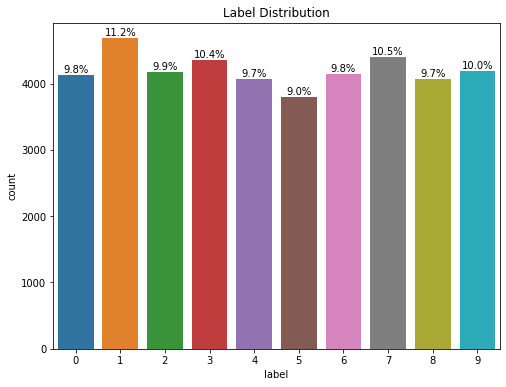

In [6]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='label',data=df_train)

plt.title("Label Distribution")
total= len(df_train.label)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

In [7]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [8]:
df_train.sum(axis=1)

0        16650
1        44609
2        13426
3        15029
4        51093
         ...  
41995    29310
41996    13416
41997    31511
41998    26387
41999    18187
Length: 42000, dtype: int64

In [9]:
df_train.shape

(42000, 785)

In [10]:
pixels = df_train.columns.tolist()[1:]
df_train["sum"] = df_train[pixels].sum(axis=1)

df_test["sum"] = df_test[pixels].sum(axis=1)

In [11]:
df_train.groupby(['label'])['sum'].mean()

label
0    34632.407551
1    15188.466268
2    29871.099354
3    28320.188003
4    24232.722495
5    25835.920422
6    27734.917331
7    22931.244263
8    30184.148413
9    24553.750000
Name: sum, dtype: float64

In [12]:
# separate target values from df_train
targets = df_train.label
features = df_train.drop("label",axis=1)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features[:] = scaler.fit_transform(features)
df_test[:] = scaler.transform(df_test)

In [14]:
del df_train

In [15]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(features)

In [16]:
Y_sklearn

array([[-5.27222487, -5.22771721],
       [19.38083905,  6.06277394],
       [-7.83434408, -1.7077624 ],
       ...,
       [ 0.60964676,  7.06775211],
       [ 2.25998582, -4.33641754],
       [-4.89813057,  1.55416705]])

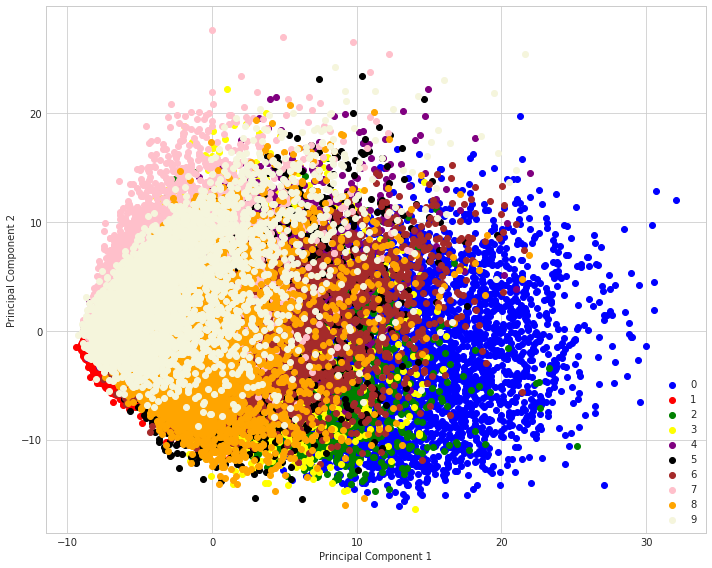

In [17]:
#referred to https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html and  https://www.kaggle.com/arthurtok/interactive-intro-to-dimensionality-reduction


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 8))
    for lab, col in zip((0,1,2,3,4,5,6,7,8,9),
                       ('blue','red','green','yellow','purple','black','brown','pink','orange','beige')):
        plt.scatter(Y_sklearn[targets==lab, 0],
                    Y_sklearn[targets==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

In [18]:
features.index

RangeIndex(start=0, stop=42000, step=1)

In [19]:
sklearn_pca_3 = sklearnPCA(n_components=3)
Y_sklearn_3 = sklearn_pca_3.fit_transform(features)
Y_sklearn_3_test = sklearn_pca_3.transform(df_test)

In [20]:
# Store results of PCA in a data frame
result=pd.DataFrame(Y_sklearn_3, columns=['PCA%i' % i for i in range(3)], index=features.index)

In [21]:
result

,PCA0,PCA1,PCA2
0,-5.272215,-5.227477,3.888873
1,19.380779,6.061996,1.339098
2,-7.834346,-1.707909,2.291322
3,-0.706301,5.846836,2.022914
4,26.648639,6.067233,0.981754
...,...,...,...
41995,13.527955,-1.320109,-3.914507
41996,-9.041416,-1.192544,2.320927
41997,0.609622,7.067642,-12.100521
41998,2.259983,-4.336149,0.714092


<Figure size 480x480 with 0 Axes>

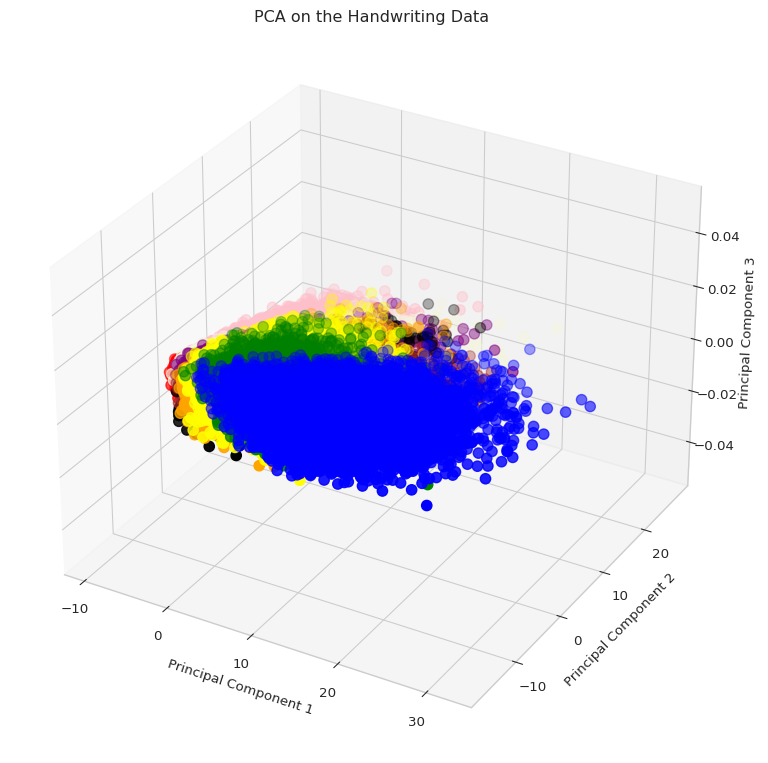

In [22]:
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

with plt.style.context('seaborn-whitegrid'):
    my_dpi=96
    fig = plt.figure(figsize=(10, 10), dpi=my_dpi)
    ax = fig.add_subplot(111,projection ='3d')
    for lab, col in zip((0,1,2,3,4,5,6,7,8,9),
                       ('blue','red','green','yellow','purple','black','brown','pink','orange','beige')):
        plt.scatter(Y_sklearn[targets==lab, 0],
                    Y_sklearn[targets==lab, 1],
                    label=lab,
                    c=col,s =60)                
        
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title("PCA on the Handwriting Data")
    plt.show()

In [23]:
encoder = LabelEncoder()
targets[:] = encoder.fit_transform(targets[:])

In [24]:
X_train,X_val, y_train,y_val = train_test_split(result,targets,random_state=1)

# Making a Model and Predictions

In [25]:
# 3 Principal Components
model = XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000, 
                        num_classes=10)

history = model.fit(X_train, y_train,eval_set =[(X_val,y_val)],early_stopping_rounds =50)
acc = accuracy_score(y_val, model.predict(X_val))
print(f"Accuracy: , {round(acc,3)}")







/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:57:47] WARNING: ../src/learner.cc:576: 
Parameters: { "num_classes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:57:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:1.87607
[1]	validation_0-mlogloss:1.69509
[2]	validation_0-mlogloss:1.57431
[3]	validation_0-mlogloss:1.49011
[4]	validation_0-mlogloss:1.42468
[5]	validation_0-mlogloss:1.37571
[6]	validation_0-mlogloss:1.33634
[7]	validation_0-mlogloss:1.30595
[8]	validation_0-mlogloss:1.28164
[9]	validation_0-mlogloss:1.26131
[10]	validation_0-mlogloss:1.24565
[11]	valid

In [26]:
X_train,X_val, y_train,y_val = train_test_split(features,targets,random_state=1)


In [27]:

model = XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000, 
                        num_classes=10)

history = model.fit(X_train, y_train,eval_set =[(X_train,y_train),(X_val,y_val)],early_stopping_rounds =5)
acc = accuracy_score(y_val, model.predict(X_val))
print(f"Accuracy: , {round(acc,3)}")

[06:58:04] WARNING: ../src/learner.cc:576: 
Parameters: { "num_classes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:58:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:1.42839	validation_1-mlogloss:1.44561
[1]	validation_0-mlogloss:1.09931	validation_1-mlogloss:1.13044
[2]	validation_0-mlogloss:0.88151	validation_1-mlogloss:0.92129
[3]	validation_0-mlogloss:0.72542	validation_1-mlogloss:0.77069
[4]	validation_0-mlogloss:0.60957	validation_1-mlogloss:0.65913
[5]	validation_0-mlogloss:0.51863	validation_1-mlogloss:0.57078
[

In [28]:
results = model.evals_result()

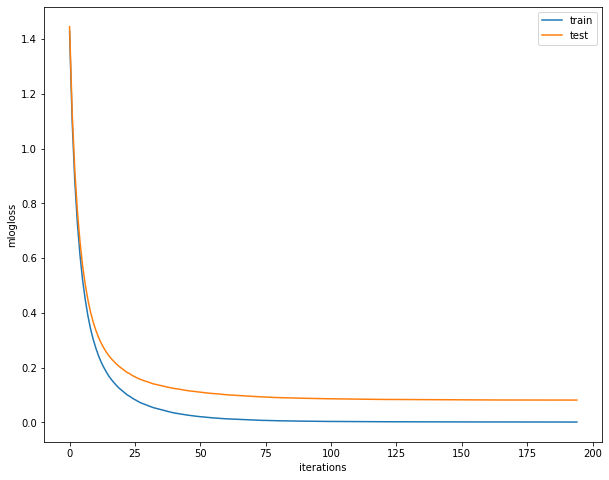

In [29]:
from matplotlib import pyplot
# plot learning curves
plt.figure(figsize=(10, 8))
pyplot.plot(results['validation_0']['mlogloss'], label='train')
pyplot.plot(results['validation_1']['mlogloss'], label='test')
# show the legend
pyplot.legend()
plt.xlabel('iterations')
plt.ylabel('mlogloss')
# show the plot
pyplot.show()

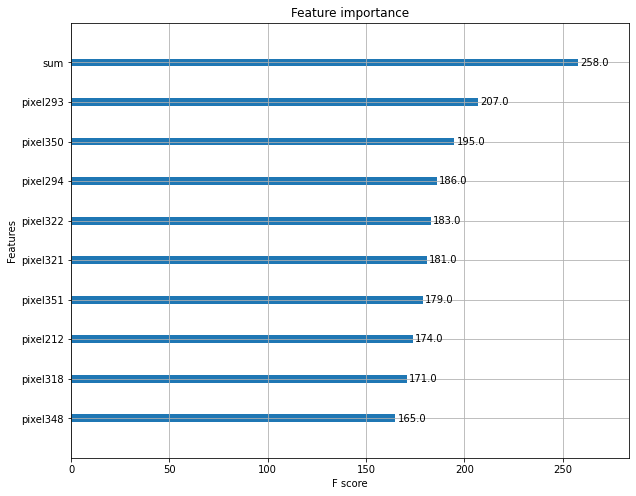

In [30]:
from xgboost import plot_importance
ax = plot_importance(model,max_num_features=10)
fig = ax.figure
fig.set_size_inches(10,8)
plt.show()

In [31]:
predictions = model.predict(df_test)



In [33]:
output = pd.read_csv("../input/digit-recognizer/sample_submission.csv")
output['Label'] = predictions
output.to_csv('submission.csv',index=False)
